In [2]:
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
nx    = 1000    
xmax  = 10000.
vs    = 3000    
ro0   = 2500    
nt    = 2000   
isx   = 500     
eps   = 0.5    
iplot = 20      

dx = xmax/(nx-1)           
x  = np.arange(0, nx)*dx   
x  = np.transpose(x)

h = np.diff(x)  


ro = x*0 + ro0
mu = x*0 + ro*vs**2


dt = 0.5*eps*dx/np.max(np.sqrt(mu/ro))

t   = np.arange(1, nt+1)*dt  

u    = np.zeros(nx)
uold = np.zeros(nx)
unew = np.zeros(nx)

p    = np.zeros(nx)
pold = np.zeros(nx)
pnew = np.zeros(nx)

<IPython.core.display.Javascript object>


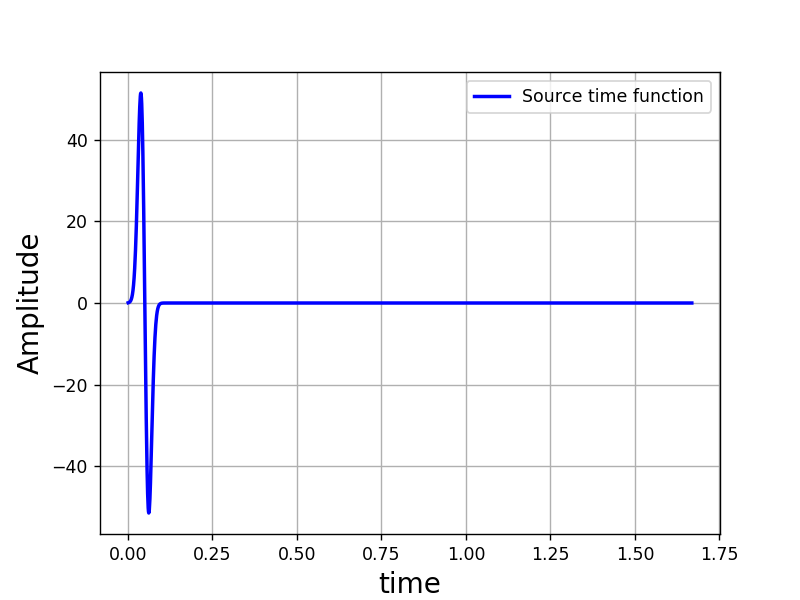

In [4]:
pt  = 20*dt     # Gaussian width
t0  = 3*pt      # Time shift
src = -2/pt**2 * (t-t0) * np.exp(-1/pt**2 * (t-t0)**2)

f = np.zeros(nx); f[isx:isx+1] = f[isx:isx+1] + 1.

plt.plot(t, src, color='b', lw=2, label='Source time function')
plt.ylabel('Amplitude', size=16)
plt.xlabel('time', size=16)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
M = np.zeros((nx,nx), dtype=float)
for i in range(1, nx-1):
    for j in range (1, nx-1):
        if j==i:
            M[i,j] = (ro[i-1]*h[i-1] + ro[i]*h[i])/3
        elif j==i+1:
            M[i,j] = ro[i]*h[i]/6
        elif j==i-1:
            M[i,j] = ro[i-1]*h[i-1]/6
        else:
            M[i,j] = 0
            
M[0,0] = ro[0]*h[0]/3
M[nx-1,nx-1] = ro[nx-1]*h[nx-2]/3
Minv = np.linalg.inv(M)

In [6]:
K = np.zeros((nx,nx), dtype=float)
for i in range(1, nx-1):
    for j in range(1, nx-1):
        if i==j:
            K[i,j] = mu[i-1]/h[i-1] + mu[i]/h[i]
        elif i==j+1:
            K[i,j] = -mu[i-1]/h[i-1]
        elif i+1==j:
            K[i,j] = -mu[i]/h[i]
        else:
            K[i,j] = 0

K[0,0] = mu[0]/h[0]
K[nx-1,nx-1] = mu[nx-1]/h[nx-2]

<IPython.core.display.Javascript object>


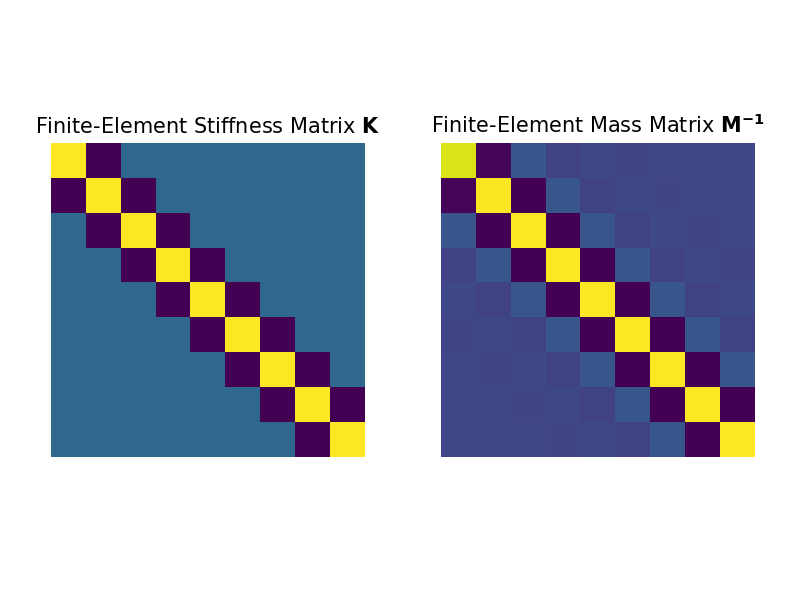

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(K[1:10,1:10])
ax1.set_title('Finite-Element Stiffness Matrix $\mathbf{K}$')
ax1.axis("off")

ax2.imshow(Minv[1:10,1:10])
ax2.set_title('Finite-Element Mass Matrix $\mathbf{M^{-1}}$')
ax2.axis("off")

plt.tight_layout()
plt.show()

In [8]:
Mfd = np.zeros((nx,nx), dtype=float)
D  = np.zeros((nx,nx), dtype=float)
dx = h[1]

for i in range(nx):
    Mfd[i,i] = 1./ro[i]
    if i>0:
        if i<nx-1:
            D[i+1,i] =1
            D[i-1,i] =1
            D[i,i] = -2
            
D = ro0 * vs**2 * D/dx**2

<IPython.core.display.Javascript object>


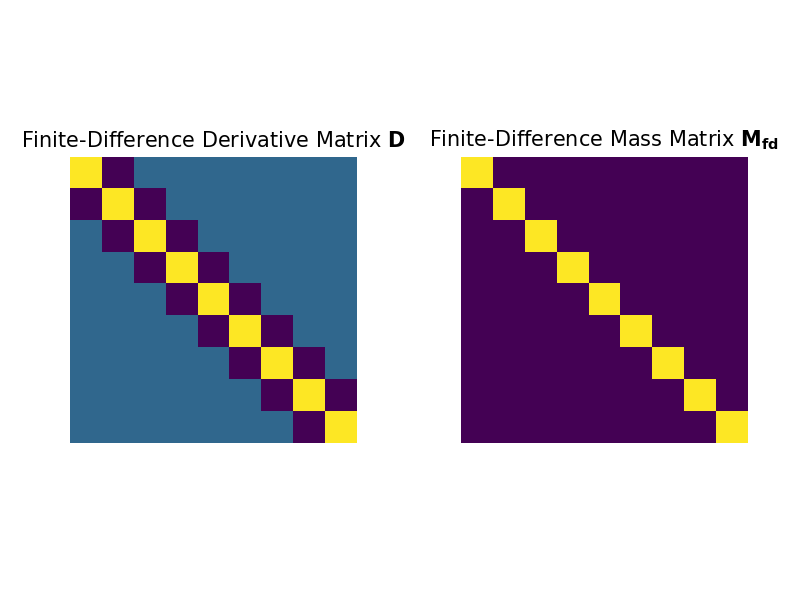

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(-D[1:10,1:10])
ax1.set_title('Finite-Difference Derivative Matrix $\mathbf{D}$')
ax1.axis("off")

ax2.imshow(Mfd[1:10,1:10])
ax2.set_title('Finite-Difference Mass Matrix $\mathbf{M_{fd}}$')
ax2.axis("off")

plt.tight_layout()
plt.show()